**Problem** 
* bir ml projesine yatırım yapılmış. Ürettiği tahminler neticisinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırıp anlamlı farkındalık olup olmadığı test edilmek isteniyor. 

**Detaylar**
* Model geliştirilmiş ve web sitesine entegre edilmiş. 
* Site kullanıcıları belirli kurala göre ikiye bölünmüş olsun.
* A grubu eski B grubu yeni sistem.
* Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor. 

**Bağımsız Örneklem T Testi**  
H0: M1=M2  
H1: M1!=M2

In [2]:
#Veri Tipi I

In [3]:
import pandas as pd
import numpy as np

In [32]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,
                  23,27,23,25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,38,28,37,
                  37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A", "B"]

A_B.head()

,A,B
0,30.0,37
1,27.0,39
2,21.0,31
3,27.0,31
4,29.0,34


In [5]:
#Veri Tipi II

In [23]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,
                  23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,38,28,37,
                  37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
#A ve A'nın grubu 
GRUP_A = np.arange(len(A)) # A içerisindeki sayı kadar grup_a oluşturur 
GRUP_A = pd.DataFrame(GRUP_A) #grup_a dataframe dönüşür.
GRUP_A[:] = "A" #grubun içerisindeki tüm değerler a olur.
A = pd.concat([A,GRUP_A], axis=1)  #a ve grup yan yana gelir.

#B VE B'nin grubu
GRUP_B=np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B,GRUP_B],axis=1)

#tüm veri 
AB= pd.concat([A,B])
AB.columns = ["gelir", "GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
27     33    B
28     26    B
29     32    B
30     33    B
31     29    B


In [10]:
import seaborn as sns

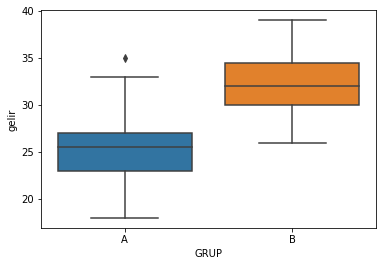

In [11]:
sns.boxplot(x="GRUP", y="gelir",data=AB);

**Varsayım Kontrolü**

In [12]:
A_B.head()

,A,B
0,30.0,37
1,27.0,39
2,21.0,31
3,27.0,31
4,29.0,34


In [13]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [25]:
#normallik varsayımı

In [26]:
from scipy.stats import shapiro
from scipy import stats

In [27]:
shapiro(A_B.A)

ShapiroResult(statistic=nan, pvalue=1.0)

In [28]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9488063454627991, pvalue=0.13329429924488068)

In [29]:
#varyans homojenliği varsayımı

H0: varyanslar homojendir.  
H1: varyanslar homojen değildir.

In [30]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=nan, pvalue=nan)

**Hipotez Testi**

In [33]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

**Nonparametrik Bağımsız İki Örneklem Testi**

In [35]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=160.0, pvalue=1.1265286369034945e-06)